In [272]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import scipy as sc
import random
import math
plt.style.use(['dark_background'])

In [297]:
# bandit_dists_mean = [-2,-1,0,1,2,3,4,5,8,12,15,20]
# bandits_dist_std = [0,0.5,1,1.5,2,2.5,3,5,8,10,15,20]
# norm = [0,1,2,3,1,1,6,10,10]
# std = [1,1,1,1,3,4,3,4,1,10]

class MAB:
    
    def __init__(self):
        k = 10
        self.k = k
        self.qgrid = np.zeros(shape=k)
        self.time = 0
        self.past_action = [0]
        self.past_reward = [0]
        self.initNorms()
        self.cumsum = [0]
        
        
    
    def initNorms(self):
        bandit_norm_arr = []
        bandits_arr = []
        for i in range(self.k):
            bandit_norm_arr.append(np.random.normal(0,1))
            indiv_bandit = []
            bandits_arr.append(indiv_bandit)
        self.norm = bandit_norm_arr
        self.bandits_past = bandits_arr
        
    def reward(self,bandit_num):
        return np.random.normal(self.norm[bandit_num],1)
        
    def action(self,method ,e,a,c):
        action_to_take = -1
        if method == 'greedy':
            if self.time == 0:
                self.qgrid = [5 for i in range(10)]
            action_to_take = np.argmax(self.qgrid)
        if method =='egreedy':
            rand = random.randint(1,100)
            if rand<=((1-e)*100):
                action_to_take = np.argmax(self.qgrid)
            else :
                action_to_take = random.choice([i for i in range(self.k -1)])
        if method == 'UCB':
            ucb = []
            if self.time == 0:
                self.time = 1
            for i in range(self.k):
                x = self.qgrid[i] + c*math.sqrt((math.log(self.time))/(len(self.bandits_past[i])+1))
                ucb.append(x)
            action_to_take = np.argmax(np.array(ucb))
        self.update(action_to_take,self.reward(action_to_take),a)
        
            
        
    def update(self,bandit_num,reward,a):
        self.bandits_past[bandit_num].append(reward)
        if a == 2:
            self.qgrid[bandit_num] = self.qgrid[bandit_num] + np.array((reward - self.qgrid[bandit_num])).mean()
        else:
            self.qgrid[bandit_num] = self.qgrid[bandit_num] + a*(reward - self.qgrid[bandit_num])
        self.past_reward.append(reward)
        self.past_action.append(bandit_num)
        self.cumsum.append(self.cumsum[-1] + reward)
        self.time += 1
        
    def run(self,iters,method,e,a,c=0):
        for i in range(iters):
            self.action(method ,e,a,c)
        self.df = pd.DataFrame(columns = ['cumsum','action','reward'])
        self.df['cumsum'] = self.cumsum
        self.df['action'] = self.past_action
        self.df['reward'] = self.past_reward
        return self.df

In [302]:
agent = MAB()
greedy = agent.run(iters = 1000, method = 'greedy',e = 0,a = 0.1)
for i in range(100):
    agent = MAB()
    greedy_df = agent.run(iters = 1000, method = 'greedy',e = 0,a = 0.1)
    greedy = greedy_df+greedy
greedy['cumsum'] = greedy['cumsum']/101
greedy['reward'] = greedy['reward']/101

# agent1 = MAB()
# greedy1 = agent.run(iters = 1000, method = 'greedy',e = 0,a = 2)
# for i in range(100):
#     agent1 = MAB()
#     greedy_df = agent1.run(iters = 1000, method = 'greedy',e = 0,a = 2)
#     greedy1 = greedy_df+greedy1
# greedy1['cumsum'] = greedy1['cumsum']/101
# greedy1['reward'] = greedy1['reward']/101


e_agent = MAB()
e_greedy = e_agent.run(iters = 1000, method = 'egreedy',e = 0.1,a = 0.1)
for i in range(100):
    e_agent = MAB()
    e_greedy_df = e_agent.run(iters = 1000, method = 'egreedy',e = 0.1,a = 0.1)
    e_greedy = e_greedy_df+e_greedy
e_greedy['cumsum'] = e_greedy['cumsum']/101
e_greedy['reward'] = e_greedy['reward']/101


ucb_agent = MAB()
ucb_greedy = ucb_agent.run(iters = 1000, method = 'UCB',e = 0.1,a = 0.1,c = 2)
for i in range(100):
    ucb_agent = MAB()
    ucb_greedy_df = ucb_agent.run(iters = 1000, method = 'UCB',e = 0.1,a = 0.1,c = 2)
    ucb_greedy = ucb_greedy_df+ucb_greedy
ucb_greedy['cumsum'] = ucb_greedy['cumsum']/101
ucb_greedy['reward'] = ucb_greedy['reward']/101

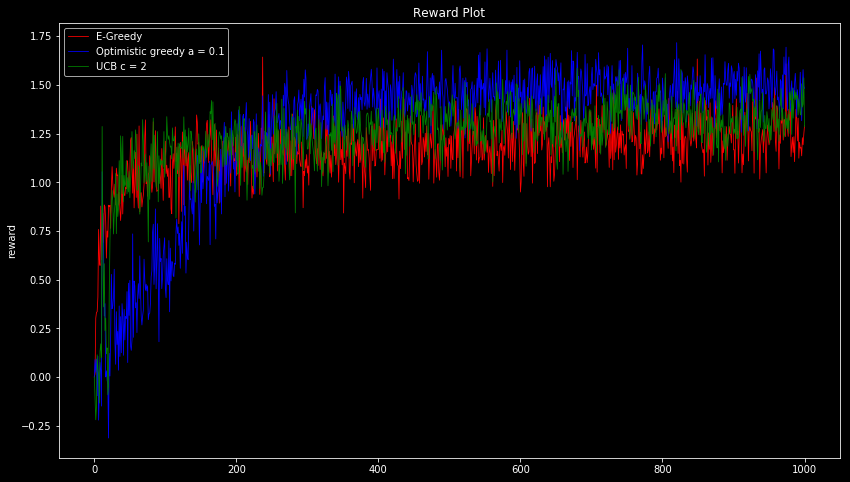

In [303]:
plt.figure(figsize = (14,8))
sns.lineplot(y= e_greedy['reward'] , x = e_greedy.index,color = 'red',label = 'E-Greedy',linewidth = 0.8).set_title('Reward Plot')
sns.lineplot(y= greedy['reward'] , x = greedy.index,color = 'blue',label = 'Optimistic greedy a = 0.1',linewidth = 0.8)
sns.lineplot(y= ucb_greedy['reward'] , x = ucb_greedy.index,color = 'green',label = 'UCB c = 2',linewidth = 0.8)